In [1]:
#-----------------------------------------------------------------------
#import cv2
import numpy as np
import os
from scipy import signal
from PIL import Image
import matplotlib.pyplot as plt
#---------------------------------------------------------------------------------

img = Image.open('monalisa.jpg')
imgr=np.array(img)
gray=imgr
# #recognizer = cv2.face.LBPHFaceRecognizer_create()
# #gray=cv2.cvtColor(img, cv2.Color_BG2GRAY)
# #RgbImage = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(imgr)
im=Image.fromarray(np.uint8(imgr))
plt.figure()
plt.imshow(img)
mean=0
var=100
sigma = var**0.5
row, col= 743,743
gauss=np.random.normal(mean,sigma,(row,col))
gauss=gauss.reshape(row,col)
gray_noisy=gray+gauss
plt.figure()
plt.imshow(gray_noisy)
## Mean filter
Hm=np.array([[1,1,1],[1,1,1],[1,1,1]])/float(9)
Gm=signal.convolve2d(gray_noisy, Hm, mode='same')
plt.figure()
plt.imshow(Gm)


[[113 115 111 ... 173 181 158]
 [111 113 110 ... 172 188 173]
 [112 113 113 ... 178 196 186]
 ...
 [ 21  20  18 ...  22  19  18]
 [ 18  18  19 ...  22  15  11]
 [ 20  19  18 ...  26  19  15]]


In [2]:
import numpy as np
import os
from scipy import signal
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
print(np.random.uniform(0,0.1,[24,1]))

[[0.01421948]
 [0.09846266]
 [0.05464889]
 [0.07922606]
 [0.07537539]
 [0.05522349]
 [0.07744851]
 [0.05525288]
 [0.03999802]
 [0.01891973]
 [0.01665547]
 [0.02653028]
 [0.05329884]
 [0.00582727]
 [0.06535334]
 [0.07113371]
 [0.00694989]
 [0.06773258]
 [0.0863692 ]
 [0.00107955]
 [0.0589372 ]
 [0.04356783]
 [0.04981844]
 [0.03823757]]


(743, 743)


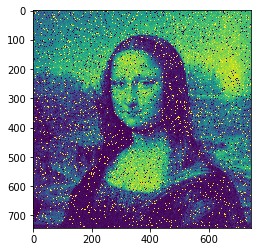

In [4]:
np.random.seed(0)
gray_sp=gray*1
sp_indices=np.random.randint(0,21,[row,col])
print(sp_indices.shape)
for i in range(row):
    for j in range(col):
        if sp_indices[i,j]==0:
            gray_sp[i,j]=0
        if sp_indices[i,j]==20:
            gray_sp[i,j]=255
plt.imshow(gray_sp)

In [6]:
#----------------------------------------------------------------
# Now we want to remove the salt and pepper noise through a Median filter
# we dont have opencv but let try.
#----------------------------------------
gray_sp_removed=cv2.medianBlur(gray_sp,3)
plt.imshow(gray_sp_removed)

NameError: name 'cv2' is not defined

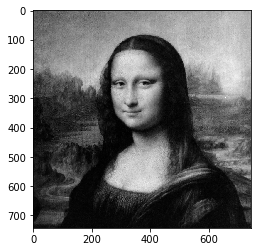

In [7]:
#-----------------------------------------------------------------
## Implementation of 3*3 median filter without using opencv
#-------------------------------------------------------
gray_sp_removed_exp=gray*1
for i in range(row):
    for j in range(col):
        local_arr=[]
        for k in range(np.max([0,i-1]), np.min([i+2,row])):
            for l in range(np.max([0,j-1]), np.min([j+2,col])):
                local_arr.append(gray_sp[k,l])
        gray_sp_removed_exp[i,j]=np.median(local_arr)
plt.imshow(gray_sp_removed_exp, cmap='gray')

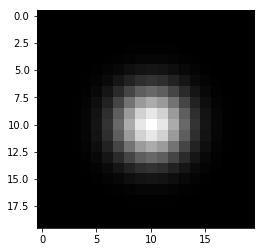

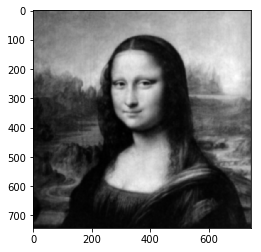

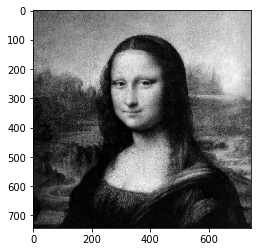

In [8]:
#--------------------------------------------------------------
## Gaussian Filter 
#------------------------------------------------------------------
Hg=np.zeros((20,20))
for i in range(20):
    for j in range(20):
        Hg[i,j]=np.exp(-((i-10)**2+(j-10)**2)/10)
plt.figure()
plt.imshow(Hg, cmap='gray')
gray_blur=signal.convolve2d(gray,Hg, mode='same')
plt.figure()
plt.imshow(gray_blur, cmap='gray')
gray_enhanced= gray + 0.025*gray_blur
plt.figure()
plt.imshow(gray_enhanced, cmap='gray')

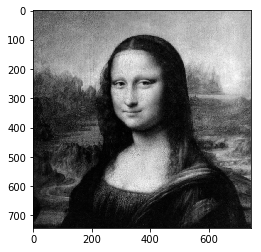

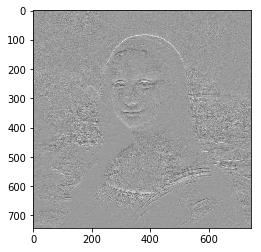

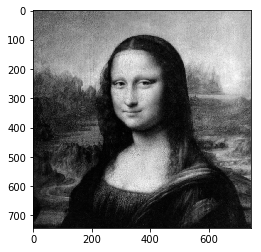

In [9]:
#-----------------------------------------------------------------------
## Sobel-Edge-Detection Filter
#--------------------------------------------------------------------------------
Hx=np.array([[1,0,1],[2,0,2],[1,0,1]], dtype=np.float32)
Gx=signal.convolve2d(gray,Hx, mode='same')
plt.figure()
plt.imshow(Gx, cmap='gray')

Hy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
Gy=signal.convolve2d(gray, Hy, mode='same')
plt.figure()
plt.imshow(Gy, cmap='gray')

G=(Gx*Gx + Gy*Gy)**0.5
plt.figure()
plt.imshow(G, cmap='gray')
